In [ ]:
using DiffEqBiological, DifferentialEquations
using Latexify, Plots

## Biological pathways in the literature

1. 
2. sdfklaj


## Notch EMT model 1
The Notch concentration is modeled within reaction rate

In [35]:
NE_model1 = @reaction_network begin
    (m1, m2),    M + R ↔ C
    (N, r1),     R ↔ D
    k,           M + M --> M + M + R
    N,           M --> ∅
    d,           (C, D, R, M) → ∅
    (p1, p2),    ∅ → (M, R)
    end m1 m2 N r1 k d p1 p2
latexify(NE_model1)
# p = (100., 100., 100.0, 50.0, 20., 10., 5., 5.)
# ss = steady_states(NE_model1,p)

┌ Warning: The RegularJump interface has changed to be matrix-free. See the documentation for more details.
└ @ DiffEqJump /Users/chentianchi/.julia/packages/DiffEqJump/TfjIU/src/jumps.jl:48


L"\begin{align}
\frac{dM(t)}{dt} =&  - m1 \cdot M \cdot R + m2 \cdot C - N \cdot M - d \cdot M + p1 \\
\frac{dR(t)}{dt} =&  - m1 \cdot M \cdot R + m2 \cdot C - N \cdot R + r1 \cdot D + \frac{k}{2} \cdot M^{2} - d \cdot R + p2 \\
\frac{dC(t)}{dt} =& m1 \cdot M \cdot R - m2 \cdot C - d \cdot C \\
\frac{dD(t)}{dt} =& N \cdot R - r1 \cdot D - d \cdot D
\end{align}
"

In [36]:
using SymPy


## Notch EMT model 2
After the removel of Notch, there should be a positive feedback loop that maintain the concentration `D` at **High** state, and `C` at **Low** state.

In [1]:
using Catalyst,DifferentialEquations
using Latexify, Plots
NE_model2 = @reaction_network begin
    (m1, m2),    M + R ↔ C
    (N, r1),     R ↔ D
    k,           M + M --> M + M + R
    N,           M --> ∅
    d,           (C, D, R, M) → ∅
    (p1, p2),    ∅ → (M, R)
    end m1 m2 N r1 k d p1 p2


odes = convert(ODESystem, NE_model2)
latexify(odes)

L"$\begin{align}
\frac{dM(t)}{dt} =&  - m1 \mathrm{M}\left( t \right) \mathrm{R}\left( t \right) + m2 \mathrm{C}\left( t \right) - N \mathrm{M}\left( t \right) - d \mathrm{M}\left( t \right) + p1 \\
\frac{dR(t)}{dt} =&  - m1 \mathrm{M}\left( t \right) \mathrm{R}\left( t \right) + m2 \mathrm{C}\left( t \right) - N \mathrm{R}\left( t \right) + r1 \mathrm{D}\left( t \right) + \frac{k \left( \mathrm{M}\left( t \right) \right)^{2}}{2} - d \mathrm{R}\left( t \right) + p2 \\
\frac{dC(t)}{dt} =& m1 \mathrm{M}\left( t \right) \mathrm{R}\left( t \right) - m2 \mathrm{C}\left( t \right) - d \mathrm{C}\left( t \right) \\
\frac{dD(t)}{dt} =& N \mathrm{R}\left( t \right) - r1 \mathrm{D}\left( t \right) - d \mathrm{D}\left( t \right)
\end{align}
$"

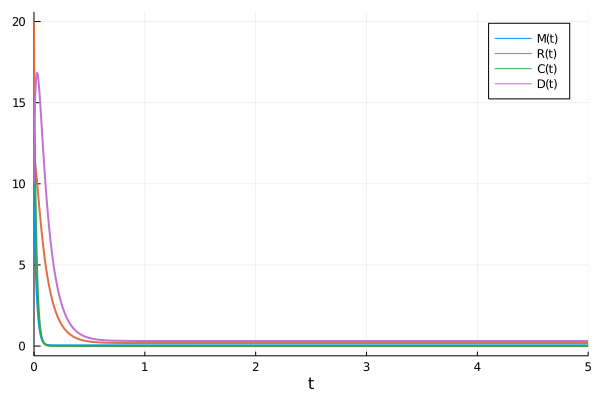

In [4]:
using DifferentialEquations, Plots

# cc = ["#835C3B" "#10DA05" "#05E9FF" "#03E9EF"]

## Parameters [m1 m2 N r1 k d p1 p2]
p = (10, 100, 100.0, 50.0, 2., 10., 5., 5.)
u₀ = [20., 20., 10.0, 10.0]
tspan = (0., 5.)

# create the ODEProblem 
ds = ODEProblem(NE_model2, u₀, tspan, p)

sol = solve(ds, Tsit5())
plot(sol, lw=2)




# Test model

In [39]:
NM_inhibit = @reaction_network begin
    (k1,k2),    N + R ↔ Ca
    (k3,k4),    M + R ↔ C0
    (d1,d2),    N + M ↔ C1
     a,         M + M --> M + M + R
    d,          (N, M, R) --> ∅
    b,          ∅ --> (N,M)
    end k1 k2 k3 k4 d1 d2 a d b;
latexify(NM_inhibit)
# parameters [α,K,n,δ,γ,β,μ]
# p = (.5, 0.5,0.5,0.5)
# ss = steady_states(repressilator,p)

┌ Warning: The RegularJump interface has changed to be matrix-free. See the documentation for more details.
└ @ DiffEqJump /Users/chentianchi/.julia/packages/DiffEqJump/TfjIU/src/jumps.jl:48


L"\begin{align}
\frac{dN(t)}{dt} =&  - k1 \cdot N \cdot R + k2 \cdot Ca - d1 \cdot N \cdot M + d2 \cdot C1 - d \cdot N + b \\
\frac{dR(t)}{dt} =&  - k1 \cdot N \cdot R + k2 \cdot Ca - k3 \cdot M \cdot R + k4 \cdot C0 + \frac{a}{2} \cdot M^{2} - d \cdot R \\
\frac{dCa(t)}{dt} =& k1 \cdot N \cdot R - k2 \cdot Ca \\
\frac{dM(t)}{dt} =&  - k3 \cdot M \cdot R + k4 \cdot C0 - d1 \cdot N \cdot M + d2 \cdot C1 - d \cdot M + b \\
\frac{dC0(t)}{dt} =& k3 \cdot M \cdot R - k4 \cdot C0 \\
\frac{dC1(t)}{dt} =& d1 \cdot N \cdot M - d2 \cdot C1
\end{align}
"

In [ ]:
@vars k1 k2 k3 k4 d1 d2 a d b N M R Ca C0 C1
rhs = [-k1*N*R + k2*Ca - d1*N*M + d2*C1 - d*N + b, -k1*N*R + k2*Ca - k3*M*R + k4*C0 + (a/2)*M^2 -d*R]


In [ ]:
using Catalyst,DifferentialEquations
using Latexify, Plots

# Model 3 with N as the external variable

In [ ]:
NE_model3 = @reaction_network begin
    (m1, m2),    M + R ↔ C
    (N, r),     R ↔ D
    (k0,k1),     DR0 + M + M ↔ DR1
    k2,          DR0 --> DR0 + R
    k3,          DR1 --> DR1 + R
    N,           M --> ∅
    d,           (C, D, R, M) → ∅
    (p1,p2),         ∅ → (M, R)
    end m1 m2 N r k0 k1 k2 k3 d p1 p2
ode3 = convert(ODESystem, NE_model3)
latexify(ode3)

In [4]:
using SymPy
@vars  m1 m2 N r k0 k1 k2 k3 d p1 p2 M R C D DR0 DR1
rhs3 = [-m1*M*R + m2*C - k0*DR0*M^2 + 2*k1*DR1 - N*M - d*M + p1;
       -m1*M*R + m2*C - N*R + r*D + k2*DR0 + k3*DR1 - d*R + p2;
       m1*M*R - m2*C - d*C;
       N*R - R*D - d*D
       -k0*DR0*M^2/2 + k1*DR1;
       k0*DR0*M^2/2 - k1*DR1];
vars = [M, R, C, D, DR0, DR1];

# CRN rate to replace
p = [m1 => 10.39, m2 => 2.8e-2, N => 2.0, r => 1.0, k0 => 9.13e-2, k1 => 8.39, k2 => 40.47, k3 => 8.39, d => 1.0, p1 => 39.17, p2 => 1.0]
rhs3_p = [rhs3.subs(p)...]
S = SymPy.solve(rhs3_p, vars)

In [ ]:
#   m1      m2      N      r      k0      k1      k2      k3      d      p1      p2

p = [10.39,  2.8e-2, 2.0, 1.0,  9.13e-2,  8.39,  40.47,  8.39, 1.0,  39.17,  1.0]
u0 = rand(1:100, 5)
tspan = (0.,20.)
prob = ODEProblem(ode3,u0,tspan,p)
sol = solve(prob, Rosenbrock23())
plot(sol)

# Model 4 without N still produce bistability

In [3]:
NE_model4 = @reaction_network begin
    (m1, m2),    M + R ↔ C
    (k0,k1),     DR0 + M + M ↔ DR1
    k2,          DR0 --> DR0 + R
    k3,          DR1 --> DR1 + R
    d,           (C, R, M) → ∅
    (p1, p2),    ∅ → (M, R)
    end m1 m2 k0 k1 k2 k3 d p1 p2
ode4 = convert(ODESystem, NE_model4)
latexify(ode4)


L"$\begin{align}
\frac{dM(t)}{dt} =&  - m1 \mathrm{M}\left( t \right) \mathrm{R}\left( t \right) + m2 \mathrm{C}\left( t \right) - 2 \frac{k0 \mathrm{DR0}\left( t \right) \left( \mathrm{M}\left( t \right) \right)^{2}}{2} + 2 k1 \mathrm{DR1}\left( t \right) - d \mathrm{M}\left( t \right) + p1 \\
\frac{dR(t)}{dt} =&  - m1 \mathrm{M}\left( t \right) \mathrm{R}\left( t \right) + m2 \mathrm{C}\left( t \right) + k2 \mathrm{DR0}\left( t \right) + k3 \mathrm{DR1}\left( t \right) - d \mathrm{R}\left( t \right) + p2 \\
\frac{dC(t)}{dt} =& m1 \mathrm{M}\left( t \right) \mathrm{R}\left( t \right) - m2 \mathrm{C}\left( t \right) - d \mathrm{C}\left( t \right) \\
\frac{dDR0(t)}{dt} =&  - \frac{k0 \mathrm{DR0}\left( t \right) \left( \mathrm{M}\left( t \right) \right)^{2}}{2} + k1 \mathrm{DR1}\left( t \right) \\
\frac{dDR1(t)}{dt} =& \frac{k0 \mathrm{DR0}\left( t \right) \left( \mathrm{M}\left( t \right) \right)^{2}}{2} - k1 \mathrm{DR1}\left( t \right)
\end{align}
$"

In [36]:
using SymPy
@vars  m1 m2 k0 k1 k2 k3 d p1 p2 M R C DR0 DR1
rhs = [-m1*M*R + m2*C - k0*DR0*M^2 + 2*k1*DR1 - d*M + p1;
       -m1*M*R + m2*C + k2*DR0 + k3*DR1 - d*R + p2;
       m1*M*R - m2*C - d*C;
       -k0*DR0*M^2/2 + k1*DR1;
       k0*DR0*M^2/2 - k1*DR1];
vars = [M, R, C, DR0, DR1];
S = SymPy.solve(rhs, vars)

1-element Array{NTuple{5,Sym},1}:
 (p1*(d + m2)/(d*(R*m1 + d + m2)), R, R*m1*p1/(d*(R*m1 + d + m2)), 2*d^2*k1*(R*m1*p1*(d + m2) + (R*m1 + d + m2)*(R*d^2 + R*d*m2 - d*p2 - m2*p2))*(R*m1 + d + m2)/((d + m2)*(2*d^2*k1*k2*(R*m1 + d + m2)^2 + d*k0*k3*p1^2*(d + m2) + k0*k3*m2*p1^2*(d + m2))), k0*p1^2*(d + m2)*(R*m1*p1*(d + m2) + (R*m1 + d + m2)*(R*d^2 + R*d*m2 - d*p2 - m2*p2))/((R*m1 + d + m2)*(2*d^2*k1*k2*(R*m1 + d + m2)^2 + d*k0*k3*p1^2*(d + m2) + k0*k3*m2*p1^2*(d + m2))))

In [ ]:
#    m1      m2     k0   k1     k2     k3   d   p1  p2 
p = [85.79, 1.18, 0.99, 1.71, 73.64, 19.5,  1.0, 85.8, 1.0]
u0 = rand(1:100, 5)
tspan = (0.,20.)
prob = ODEProblem(ode4,u0,tspan,p)
sol = solve(prob, Rosenbrock23())
plot(sol)

In [41]:
using ProgressMeter

In [42]:
# plotly()
tspan = (0.,50.)
p = [85.79, 1.18, 0.99, 1.71, 73.64, 19.5,  1.0, 85.8, 1.0]
ss =[]
u0s = []
@showprogress for i = 1:100
    u0 = rand(1:200, 5)
    append!(u0s, u0)
    prob = ODEProblem(ode4,u0,tspan,p)
    sol = solve(prob, Rosenbrock23())
    append!(ss,sol[3,end])
    # plt = plot(sol, vars = [3])
    # display(plt)
end 

Progress: 100%|█████████████████████████████████████████| Time: 0:06:20


# Complete Model 5


In [ ]:
NE_model5 = @reaction_network begin
    # core interaction between NICD MITF and RBPJ
    (m1, m2),    M + R ↔ C
    (k0,k1),     DR0 + M + M ↔ DR1
    k2,          DR0 --> DR0 + R
    k3,          DR1 --> DR1 + R
    d,           (C, R, M) → ∅
    (p1, p2),    ∅ → (M, R)

    # The bivalent promoter of mir-222
    H3K4 + KDM5A 

    # The EZH2 interaction with mir34


    # Edge regulation from the KDM5A and EZH2 and edge regulation feedback


    end m1 m2 k0 k1 k2 k3 d p1 p2
ode4 = convert(ODESystem, NE_model5)
latexify(ode4)